# Working with Time Series

Pandas was developed in the context of financial modeling, so as you might expect, it contains a fairly extensive set of tools for working with dates, times, and time-indexed data.
Date and time data comes in a few flavors, which we will discuss here:

- *Time stamps* reference particular moments in time (e.g., July 4th, 2015 at 7:00am).
- *Time intervals* and *periods* reference a length of time between a particular beginning and end point; for example, the year 2015. Periods usually reference a special case of time intervals in which each interval is of uniform length and does not overlap (e.g., 24 hour-long periods comprising days).
- *Time deltas* or *durations* reference an exact length of time (e.g., a duration of 22.56 seconds).

In this section, we will introduce how to work with each of these types of date/time data in Pandas.
This short section is by no means a complete guide to the time series tools available in Python or Pandas, but instead is intended as a broad overview of how you as a user should approach working with time series.

## Dates and Times in Python

The Python world has a number of available representations of dates, times, deltas, and timespans.
The time series tools provided by Pandas tend to be the most useful for data science applications and we will focus on those here.

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns 

## Pandas Time Series: Indexing by Time

Where the Pandas time series tools really become useful is when you begin to *index data by timestamps*.
For example, we can construct a ``Series`` object that has time indexed data:

In [2]:
index = pd.DatetimeIndex(['2014-07-04', '2014-08-04',
                          '2015-07-04', '2015-08-04'])
data = pd.Series([0, 1, 2, 3], index=index)
data

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

Now that we have this data in a ``Series``, we can make use of any of the ``Series`` indexing patterns we discussed in previous sections, passing values that can be coerced into dates:

In [3]:
data['2014-07-04':'2015-07-04']

2014-07-04    0
2014-08-04    1
2015-07-04    2
dtype: int64

There are additional special date-only indexing operations, such as passing a year to obtain a slice of all data from that year:

In [4]:
data['2015']

2015-07-04    2
2015-08-04    3
dtype: int64

Later, we will see additional examples of the convenience of dates-as-indices.
But first, a closer look at the available time series data structures.

## Pandas Time Series Data Structures

This section will introduce the fundamental Pandas data structures for working with time series data:

- For *time stamps*, Pandas provides the ``Timestamp`` type. The associated Index structure is ``DatetimeIndex``.
- For *time Periods*, Pandas provides the ``Period`` type. This encodes a fixed-frequency interval based on ``numpy.datetime64``. The associated index structure is ``PeriodIndex``.
- For *time deltas* or *durations*, Pandas provides the ``Timedelta`` type. ``Timedelta`` is a more efficient replacement for Python's native ``datetime.timedelta`` type, and is based on ``numpy.timedelta64``. The associated index structure is ``TimedeltaIndex``.

The most fundamental of these date/time objects are the ``Timestamp`` and ``DatetimeIndex`` objects.
While these class objects can be invoked directly, it is more common to use the ``pd.to_datetime()`` function, which can parse a wide variety of formats.
Passing a single date to ``pd.to_datetime()`` yields a ``Timestamp``; passing a series of dates by default yields a ``DatetimeIndex``:

In [5]:
dates = pd.to_datetime(['4th of July, 2019', '2019-Jul-5',
                        '07-06-2019', '20190707'])
dates

DatetimeIndex(['2019-07-04', '2019-07-05', '2019-07-06', '2019-07-07'], dtype='datetime64[ns]', freq=None)

A ``TimedeltaIndex`` is created, for example, when a date is subtracted from another:

In [6]:
dates - dates[0]

TimedeltaIndex(['0 days', '1 days', '2 days', '3 days'], dtype='timedelta64[ns]', freq=None)

## Resampling, Shifting, and Windowing

The ability to use dates and times as indices to intuitively organize and access data is an important piece of the Pandas time series tools.
The benefits of indexed data in general (automatic alignment during operations, intuitive data slicing and access, etc.) still apply, and Pandas provides several additional time series-specific operations.

We will take a look at a few of those here, using some stock price data as an example.
Because Pandas was developed largely in a finance context, it includes some very specific tools for financial data.

Here we will load GOOG's history:

In [7]:
url = 'https://raw.githubusercontent.com/soltaniehha/Business-Analytics/master/data/GOOGL.csv'

googl = pd.read_csv(url, parse_dates=True, index_col= 'Date')

print("There are {} rows and {} columns in this DataFrame.".format(googl.shape[0], googl.shape[1]))

There are 3683 rows and 6 columns in this DataFrame.


In [8]:
googl.tail()

High          Low         Open        Close     Volume  \
Date                                                                        
2019-04-01  1200.199951  1186.359985  1187.540039  1198.979980  1385300.0   
2019-04-02  1205.810059  1191.239990  1200.050049  1205.540039   914400.0   
2019-04-03  1220.599976  1205.079956  1212.699951  1210.810059  1109600.0   
2019-04-04  1220.550049  1209.040039  1211.290039  1219.449951  1049200.0   
2019-04-05  1220.390015  1210.030029  1219.300049  1211.449951  1001044.0   

              Adj Close  
Date                     
2019-04-01  1198.979980  
2019-04-02  1205.540039  
2019-04-03  1210.810059  
2019-04-04  1219.449951  
2019-04-05  1211.449951

In [9]:
googl.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3683 entries, 2004-08-19 to 2019-04-05
Data columns (total 6 columns):
High         3683 non-null float64
Low          3683 non-null float64
Open         3683 non-null float64
Close        3683 non-null float64
Volume       3683 non-null float64
Adj Close    3683 non-null float64
dtypes: float64(6)
memory usage: 201.4 KB


Selecting a single Datetime:

In [10]:
googl.loc['2019-04-05']

High         1.220390e+03
Low          1.210030e+03
Open         1.219300e+03
Close        1.211450e+03
Volume       1.001044e+06
Adj Close    1.211450e+03
Name: 2019-04-05 00:00:00, dtype: float64

Or we could pass a column to extract the exact value we are looking for:

In [11]:
googl.loc['2019-04-05', 'Close']

1211.449951171875

We could also pass a higher level Datatime such as month and it will work like a filter:

In [12]:
googl.loc['2019-04']

High          Low         Open        Close     Volume  \
Date                                                                        
2019-04-01  1200.199951  1186.359985  1187.540039  1198.979980  1385300.0   
2019-04-02  1205.810059  1191.239990  1200.050049  1205.540039   914400.0   
2019-04-03  1220.599976  1205.079956  1212.699951  1210.810059  1109600.0   
2019-04-04  1220.550049  1209.040039  1211.290039  1219.449951  1049200.0   
2019-04-05  1220.390015  1210.030029  1219.300049  1211.449951  1001044.0   

              Adj Close  
Date                     
2019-04-01  1198.979980  
2019-04-02  1205.540039  
2019-04-03  1210.810059  
2019-04-04  1219.449951  
2019-04-05  1211.449951

Pandas can parse out alternative formats, for instance:

In [13]:
googl.loc['April 2019']

High          Low         Open        Close     Volume  \
Date                                                                        
2019-04-01  1200.199951  1186.359985  1187.540039  1198.979980  1385300.0   
2019-04-02  1205.810059  1191.239990  1200.050049  1205.540039   914400.0   
2019-04-03  1220.599976  1205.079956  1212.699951  1210.810059  1109600.0   
2019-04-04  1220.550049  1209.040039  1211.290039  1219.449951  1049200.0   
2019-04-05  1220.390015  1210.030029  1219.300049  1211.449951  1001044.0   

              Adj Close  
Date                     
2019-04-01  1198.979980  
2019-04-02  1205.540039  
2019-04-03  1210.810059  
2019-04-04  1219.449951  
2019-04-05  1211.449951

Slicing using Datatimes:

In [14]:
googl.loc['2019-04-03':'2019-04-05']

High          Low         Open        Close     Volume  \
Date                                                                        
2019-04-03  1220.599976  1205.079956  1212.699951  1210.810059  1109600.0   
2019-04-04  1220.550049  1209.040039  1211.290039  1219.449951  1049200.0   
2019-04-05  1220.390015  1210.030029  1219.300049  1211.449951  1001044.0   

              Adj Close  
Date                     
2019-04-03  1210.810059  
2019-04-04  1219.449951  
2019-04-05  1211.449951

# Resampling
One common need for time series data is resampling at a higher or lower frequency. This can be done using the `resample()` method. Statistical methods over different time intervals:
* `mean()`
* `sum()`
* `count()`

Down-sampling: reduce datetime rows to slower frequency. E.g., from daily to monthly

Up-sampling: increase datetime rows to faster frequency. E.g., from daily to hourly

Let's resample our `googl` DataFrame to get the monthly averages for the past years (down-sampling):

In [15]:
googl_subset = googl.loc['2018-04-05':'2019-04-05']
googl_subset.resample('M').mean()

High          Low         Open        Close        Volume  \
Date                                                                           
2018-04-30  1057.963881  1033.655562  1047.461667  1043.220564  2.271706e+06   
2018-05-31  1082.155906  1063.676824  1070.547727  1074.852717  1.682023e+06   
2018-06-30  1158.890474  1138.985229  1148.376192  1149.319987  1.913533e+06   
2018-07-31  1211.672846  1187.250959  1197.510486  1201.263811  1.989652e+06   
2018-08-31  1250.471738  1232.073922  1241.803483  1240.653915  1.490665e+06   
2018-09-30  1195.738403  1173.364740  1185.985782  1185.032104  1.890837e+06   
2018-10-31  1142.802172  1104.944784  1125.933052  1121.256088  2.458570e+06   
2018-11-30  1078.329520  1050.800476  1065.182864  1066.168091  1.871990e+06   
2018-12-31  1069.451570  1033.248943  1052.484732  1048.089998  2.256411e+06   
2019-01-31  1089.727138  1067.015247  1078.022374  1080.988578  1.659924e+06   
2019-02-28  1130.194741  1110.895784  1120.121588  1121.415791  1.716247e+06   
2019-03-31  1192.932844  1172.674282  1182.332392  1184.328578  1.580329e+06   
2019-04-30  1213.510010  1200.350000  1206.176025  1209.245996  1.091909e+06   

              Adj Close  
Date                     
2018-04-30  1043.220564  
2018-05-31  1074.852717  
2018-06-30  1149.319987  
2018-07-31  1201.263811  
2018-08-31  1240.653915  
2018-09-30  1185.032104  
2018-10-31  1121.256088  
2018-11-30  1066.168091  
2018-12-31  1048.089998  
2019-01-31  1080.988578  
2019-02-28  1121.415791  
2019-03-31  1184.328578  
2019-04-30  1209.245996

In the above code we have used 'M' to resample monthly. Use the table below for more up-sampling and down-sampling options:

| Code   | Description         | Code   | Description          |
|--------|---------------------|--------|----------------------|
| ``D``  | Calendar day        | ``B``  | Business day         |
| ``W``  | Weekly              |    ``  |                      |
| ``M``  | Month end           | ``BM`` | Business month end   |
| ``Q``  | Quarter end         | ``BQ`` | Business quarter end |
| ``A``  | Year end            | ``BA`` | Business year end    |
| ``H``  | Hours               | ``BH`` | Business hours       |
| ``T``  | Minutes             |    ``  |                      |
| ``S``  | Seconds             |    ``  |                      |
| ``L``  | Milliseonds         |    ``  |                      |
| ``U``  | Microseconds        |    ``  |                      |
| ``N``  | nanoseconds         |    ``  |                      |

## Exercise 1

Up-sample the following subset by a daily scale, "D". Note that our current dataset is based on business days, and not daily.

In [16]:
data = googl.loc['2019-03-21':'2019-04-05']
data

High          Low         Open        Close     Volume  \
Date                                                                        
2019-03-21  1236.439941  1216.579956  1220.000000  1236.130005  1407500.0   
2019-03-22  1233.630005  1206.000000  1228.849976  1207.650024  1721100.0   
2019-03-25  1209.439941  1190.000000  1199.560059  1197.380005  1378800.0   
2019-03-26  1207.650024  1181.760010  1205.189941  1189.839966  1537600.0   
2019-03-27  1191.920044  1164.229980  1191.920044  1178.010010  1471400.0   
2019-03-28  1177.250000  1163.430054  1175.500000  1172.270020  1120100.0   
2019-03-29  1183.969971  1166.380005  1180.180054  1176.890015  1544500.0   
2019-04-01  1200.199951  1186.359985  1187.540039  1198.979980  1385300.0   
2019-04-02  1205.810059  1191.239990  1200.050049  1205.540039   914400.0   
2019-04-03  1220.599976  1205.079956  1212.699951  1210.810059  1109600.0   
2019-04-04  1220.550049  1209.040039  1211.290039  1219.449951  1049200.0   
2019-04-05  1220.390015  1210.030029  1219.300049  1211.449951  1001044.0   

              Adj Close  
Date                     
2019-03-21  1236.130005  
2019-03-22  1207.650024  
2019-03-25  1197.380005  
2019-03-26  1189.839966  
2019-03-27  1178.010010  
2019-03-28  1172.270020  
2019-03-29  1176.890015  
2019-04-01  1198.979980  
2019-04-02  1205.540039  
2019-04-03  1210.810059  
2019-04-04  1219.449951  
2019-04-05  1211.449951

In [17]:
# Your answer goes here


High          Low         Open        Close     Volume  \
Date                                                                        
2019-03-21  1236.439941  1216.579956  1220.000000  1236.130005  1407500.0   
2019-03-22  1233.630005  1206.000000  1228.849976  1207.650024  1721100.0   
2019-03-23          NaN          NaN          NaN          NaN        NaN   
2019-03-24          NaN          NaN          NaN          NaN        NaN   
2019-03-25  1209.439941  1190.000000  1199.560059  1197.380005  1378800.0   
2019-03-26  1207.650024  1181.760010  1205.189941  1189.839966  1537600.0   
2019-03-27  1191.920044  1164.229980  1191.920044  1178.010010  1471400.0   
2019-03-28  1177.250000  1163.430054  1175.500000  1172.270020  1120100.0   
2019-03-29  1183.969971  1166.380005  1180.180054  1176.890015  1544500.0   
2019-03-30          NaN          NaN          NaN          NaN        NaN   
2019-03-31          NaN          NaN          NaN          NaN        NaN   
2019-04-01  1200.199951  1186.359985  1187.540039  1198.979980  1385300.0   
2019-04-02  1205.810059  1191.239990  1200.050049  1205.540039   914400.0   
2019-04-03  1220.599976  1205.079956  1212.699951  1210.810059  1109600.0   
2019-04-04  1220.550049  1209.040039  1211.290039  1219.449951  1049200.0   
2019-04-05  1220.390015  1210.030029  1219.300049  1211.449951  1001044.0   

              Adj Close  
Date                     
2019-03-21  1236.130005  
2019-03-22  1207.650024  
2019-03-23          NaN  
2019-03-24          NaN  
2019-03-25  1197.380005  
2019-03-26  1189.839966  
2019-03-27  1178.010010  
2019-03-28  1172.270020  
2019-03-29  1176.890015  
2019-03-30          NaN  
2019-03-31          NaN  
2019-04-01  1198.979980  
2019-04-02  1205.540039  
2019-04-03  1210.810059  
2019-04-04  1219.449951  
2019-04-05  1211.449951

You notice that this has caused some NaN values due to the weekend. Use the forward fill method, `ffill()`, to fill the missing values by chaining it to the end of the aggregation:

In [18]:
# Your answer goes here


High          Low         Open        Close     Volume  \
Date                                                                        
2019-03-21  1236.439941  1216.579956  1220.000000  1236.130005  1407500.0   
2019-03-22  1233.630005  1206.000000  1228.849976  1207.650024  1721100.0   
2019-03-23  1233.630005  1206.000000  1228.849976  1207.650024  1721100.0   
2019-03-24  1233.630005  1206.000000  1228.849976  1207.650024  1721100.0   
2019-03-25  1209.439941  1190.000000  1199.560059  1197.380005  1378800.0   
2019-03-26  1207.650024  1181.760010  1205.189941  1189.839966  1537600.0   
2019-03-27  1191.920044  1164.229980  1191.920044  1178.010010  1471400.0   
2019-03-28  1177.250000  1163.430054  1175.500000  1172.270020  1120100.0   
2019-03-29  1183.969971  1166.380005  1180.180054  1176.890015  1544500.0   
2019-03-30  1183.969971  1166.380005  1180.180054  1176.890015  1544500.0   
2019-03-31  1183.969971  1166.380005  1180.180054  1176.890015  1544500.0   
2019-04-01  1200.199951  1186.359985  1187.540039  1198.979980  1385300.0   
2019-04-02  1205.810059  1191.239990  1200.050049  1205.540039   914400.0   
2019-04-03  1220.599976  1205.079956  1212.699951  1210.810059  1109600.0   
2019-04-04  1220.550049  1209.040039  1211.290039  1219.449951  1049200.0   
2019-04-05  1220.390015  1210.030029  1219.300049  1211.449951  1001044.0   

              Adj Close  
Date                     
2019-03-21  1236.130005  
2019-03-22  1207.650024  
2019-03-23  1207.650024  
2019-03-24  1207.650024  
2019-03-25  1197.380005  
2019-03-26  1189.839966  
2019-03-27  1178.010010  
2019-03-28  1172.270020  
2019-03-29  1176.890015  
2019-03-30  1176.890015  
2019-03-31  1176.890015  
2019-04-01  1198.979980  
2019-04-02  1205.540039  
2019-04-03  1210.810059  
2019-04-04  1219.449951  
2019-04-05  1211.449951

The visualization below shows what different ways of filling NA in up-sampling will look like:

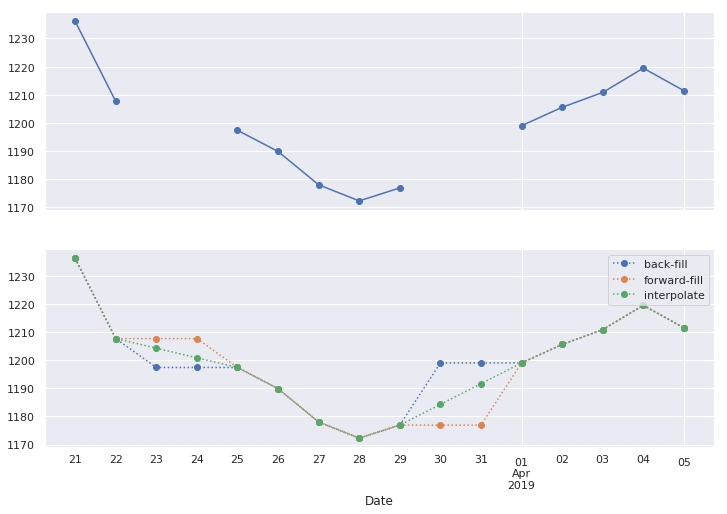

In [19]:
sns.set(rc={'figure.figsize':(12,8)})  # Figure size

fig, ax = plt.subplots(2, sharex=True)

data = data['Close']
data.resample('D').mean().plot(ax=ax[0], marker='o')

data.resample('D').bfill().plot(ax=ax[1], style=':o')
data.resample('D').ffill().plot(ax=ax[1], style=':o')
data.resample('D').interpolate().plot(ax=ax[1], style=':o')

ax[1].legend(["back-fill", "forward-fill", "interpolate"]);

The top panel is the default: non-business days are left as NA values and do not appear on the plot.

The bottom panel shows the differences between different strategies for filling the gaps: forward-filling, backward-filling, and interpolating.

## Exercise 2

Using the same DataFrame, can you generate a weekly aggregate for the month of March in 2019?

Hint: chain `.loc['2019-03']` to `googl` DataFrame to get March 2019.

In [20]:
# Your answer goes here


High          Low         Open        Close     Volume  \
Date                                                                        
2019-03-03  1150.000000  1131.000000  1131.000000  1148.520020  1704300.0   
2019-03-10  1166.755981  1145.245996  1155.344019  1157.673975  1529660.0   
2019-03-17  1199.831982  1182.004004  1187.450024  1191.680029  1773280.0   
2019-03-24  1219.683984  1198.621973  1206.331982  1212.244019  1583100.0   
2019-03-31  1194.045996  1173.160010  1190.470020  1182.878003  1410480.0   

              Adj Close  
Date                     
2019-03-03  1148.520020  
2019-03-10  1157.673975  
2019-03-17  1191.680029  
2019-03-24  1212.244019  
2019-03-31  1182.878003

# Visualizing Time Series

For simplicity, we'll use just the closing price:

In [21]:
googl_close = googl['Close']

We can visualize this using the ``plot()`` method:

Text(0.5, 1.0, 'GOOGL Daily Closing Price - Time Series')

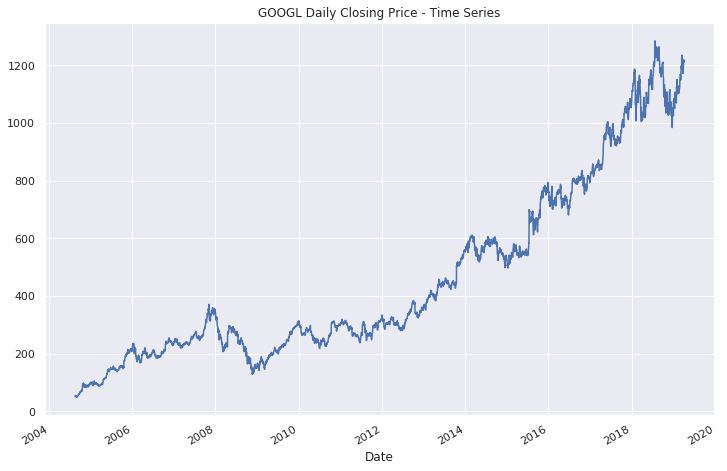

In [22]:
googl_close.plot()
plt.title('GOOGL Daily Closing Price - Time Series')

We can add an aggregated result using the `resample()` method:

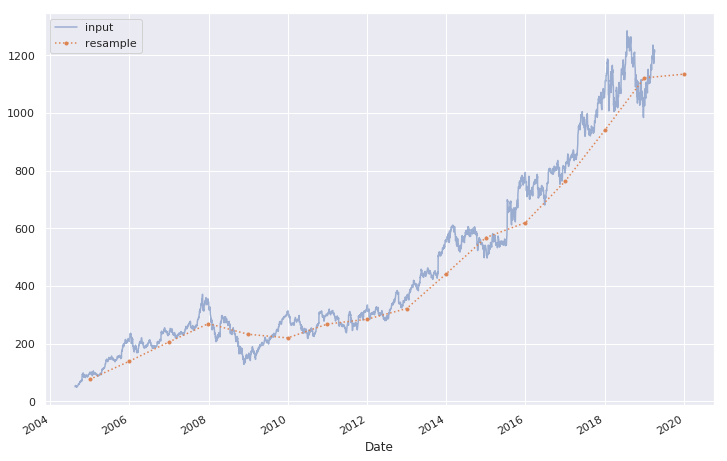

In [23]:
googl_close.plot(alpha=0.5, style='-')
googl_close.resample('A').mean().plot(style=':.')

plt.legend(['input', 'resample'], loc='upper left')

## Exercise 3

Redo the graph except for the last year only ('2018-04-05':'2019-04-05'). Instead of a Year end aggregation use a bi-weekly, "2W":

Hint: You can get a subset from `googl_close` and save it to a new Series, or chain the subset to directly do the plotting.

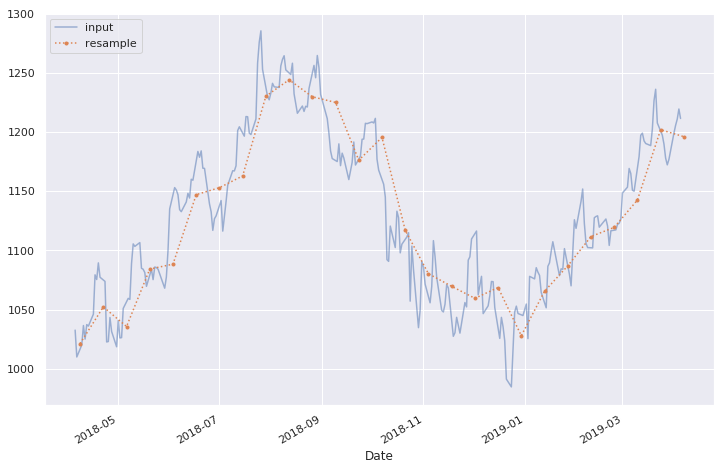

In [24]:
# Your answer goes here


## Exercise 4

Plot the time series of the "Volume" field from `googl` DataFrame for the past 10 years. Use a "2Q" aggregation which stands for every two quarters.

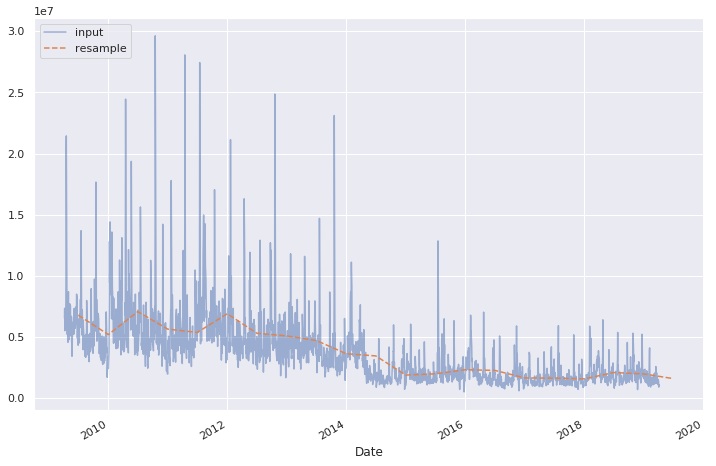

In [44]:
# Your answer goes here


# Rolling windows

Rolling statistics are series-specific operation implemented by Pandas.

These can be accomplished via the ``rolling()`` attribute of ``Series`` and ``DataFrame`` objects, which returns a view similar to what we saw with the ``groupby`` operation.

This rolling view makes available a number of aggregation operations by default.

For example, here is the one-year centered rolling mean and standard deviation of the Google stock prices:

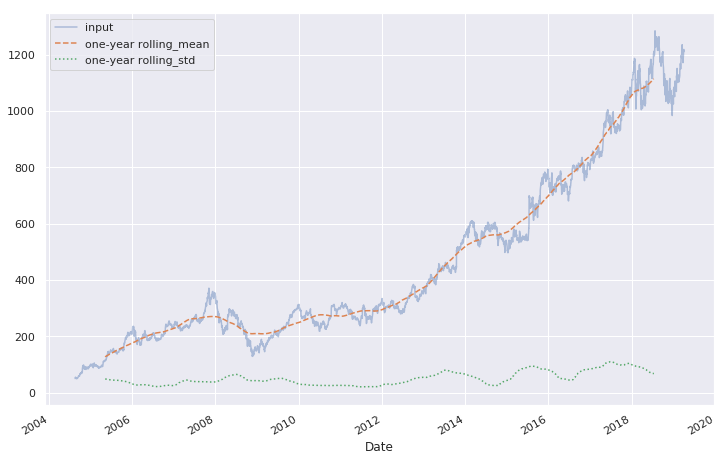

In [26]:
rolling = googl_close.rolling(365, center=True)

googl_close.plot(alpha=0.4, style='-')
rolling.mean().plot(style='--')
rolling.std().plot(style=':')

plt.legend(['input', 'one-year rolling_mean', 'one-year rolling_std'], loc='upper left')